/usr/local/lib/python3.7/site-packages/flat_table/_norm.py:53: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_withvalues = pd.io.json.json_normalize(ds_withvalues)


Please enter availability zone:
us-east-2a
Please enter an instance type:
m5.xlarge
Please enter the window for moving average:
10


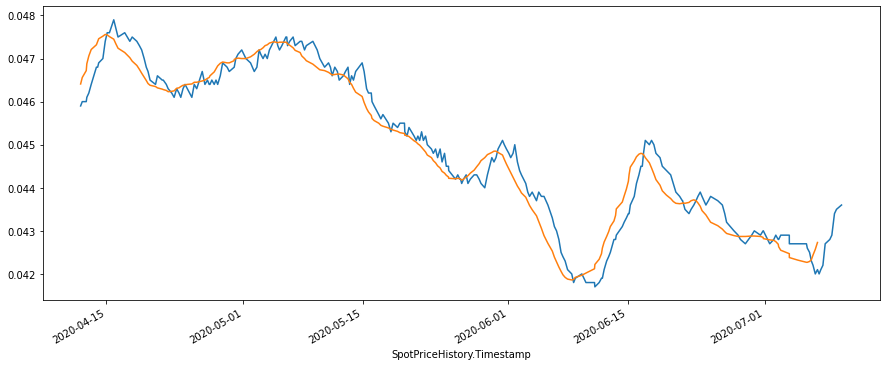

In [27]:
import pandas as pd
import flat_table
import matplotlib.pyplot as plt
import seaborn as sns

#file to DF
d = pd.read_json (r'/Users/talagermani/Desktop/spotproject/3mdata/east2.json')
df = flat_table.normalize(d)
df['SpotPriceHistory.SpotPrice'] = df['SpotPriceHistory.SpotPrice'].astype('float32')
df['SpotPriceHistory.Timestamp'] = pd.to_datetime(df['SpotPriceHistory.Timestamp'], format='%Y-%m-%dT%H:%M:%S%z')
df = df.set_index('SpotPriceHistory.Timestamp')
df.rename(columns={'SpotPriceHistory.InstanceType': 'InstanceType', 'SpotPriceHistory.SpotPrice': 'Price', 'SpotPriceHistory.AvailabilityZone': 'Zone'}, inplace=True)

# # going through instance types and listing their column values
# i = []
# i = df.InstanceType.unique()
# for x in i:
#    print(x)
#    print(df[(df['InstanceType']==x)].mean())
#    print(df[(df['InstanceType']==x)].std())

# # finding residuals 
# i = []
# i = df.InstanceType.unique()
# for x in i:
#     z = []
#     z = df.Zone.unique()
#     print(x)
#     for y in z:
#         print(y)
#         print(df[(df['Zone']==y) & (df['InstanceType']==x)].mean() - df[df['InstanceType']==x].mean())

# # price means
# i = []
# i = df.InstanceType.unique()
# for x in i:
#     z = []
#     z = df.Zone.unique()
#     print(x)
#     for y in z:
#         print(y)
#         print(df[(df['Zone']==y) & (df['InstanceType']==x)].mean())

#residuals
#df[(df['Zone'] == "us-east-2a") & (df['InstanceType'] == "m5.xlarge")].mean() - df(df['InstanceType'] == "m5.xlarge").mean()
#df[(df['InstanceType'] == "m5.xlarge") & (df['Zone'] == "us-east-2a" )].mean() - df[df['InstanceType'] == "m5.xlarge"].mean()
# # plot making (import az files first by repeating file to df code for multiple files)
# sns.set(rc={'figure.figsize':(18, 12)})

# #time series scatter graph
# ax = af['Price'].plot(marker='.', alpha=0.5, color= 'r', linestyle='None', figsize=(18, 12), label='', subplots=True)
# ax = bf['Price'].plot(marker='.', alpha=0.5, color= 'm', linestyle='None', figsize=(18, 12), ax=ax, label='', subplots=True)
# cf['Price'].plot(marker='.', alpha=0.5, color= 'y', linestyle='None', figsize=(18, 12), ax=ax, label='', subplots=True)

# #time series line graph
# ax = af['Price'].plot(color= 'r', figsize=(18, 12), label='2A', subplots=True)
# ax = bf['Price'].plot(color= 'm', figsize=(18, 12), ax=ax, label='2B', subplots=True)
# cf['SpotPriceHistory.SpotPrice'].plot(color= 'y', figsize=(18, 12), ax=ax, label='2C', subplots=True)

# plt.title('M5xl US-EAST-2 Prices')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()

# #summary stats 
# of.describe()

z = input("Please enter availability zone:\n")
it = input("Please enter an instance type:\n")
w = int(input("Please enter the window for moving average:\n"))
nf = df[(df['Zone'] == z) & (df['InstanceType'] == it)]
nf['Price'].plot(figsize=(15,8))
nf['Price'].rolling(window= w).mean().plot(figsize=(15,6))
nf['moving_avg'] = nf['Price'].rolling(window= w).mean()